# Get the Data

## Download the Data

In [1]:
import os 
import tarfile # tarfile用于打包和解压
from six.moves import urllib # 用于下载数据

import ssl # 用于解决调用setch_housing_data函数时报SSL证书验证错误
ssl._create_default_https_context = ssl._create_unverified_context

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/" # 下载网址
HOUSING_PATH = "datasets/housing" # tgz所在目录
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz" # 压缩包url


In [2]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path): # 用于判断一个对象是否是一个目录
        os.makedirs(housing_path) 
    tgz_path = os.path.join(housing_path, "housing.tgz") # 路径拼接，得到本地相对路径
    urllib.request.urlretrieve(housing_url, tgz_path) # 下载url的内容到本地路径
    housing_tgz = tarfile.open(tgz_path)# 打开下载好的文件
    housing_tgz.extractall(path=housing_path) # 解压到本地文件夹
    housing_tgz.close() # 关闭解压

In [3]:
fetch_housing_data()

## Load the Data using Pandas

In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [51]:
housing = load_housing_data()

# Take a Quick Look at the Data Structure

#### 使用Pandas从csv中读取出的数据类型是DataFrame，可以通过【head()函数】查看数据的前5行。
#### 我们可以看出：每一行表示一个地区，每个地区都有十个属性，分别是经度、纬度、房屋平均年限、总房间数、总卧室数、人口数量、家庭数、平均收入、平均房价、邻海情况

In [53]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### 使用【info()函数】查看数据的描述：包括数据的行数（entries）、列数、每个属性的类型、是否为非空值等

In [54]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### 针对非数值型的属性，可以使用【value_counts()函数】查看其分类情况，以及每种分类的样本数

In [55]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### 针对数值型属性，可以使用【describe()函数】查看每种属性的信息，如平均值(mean)、标准差(std)、最小值(min)、最大值(max)、25%的样本小于什么值、50%的样本小于什么值，75%的样本小于什么值

In [56]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### 除了通过表格分析数据，还可以通过直方图、散点图等图像直观地分析数据之间、属性之间的关系

#### 使用直方图画出每种属性的值分布

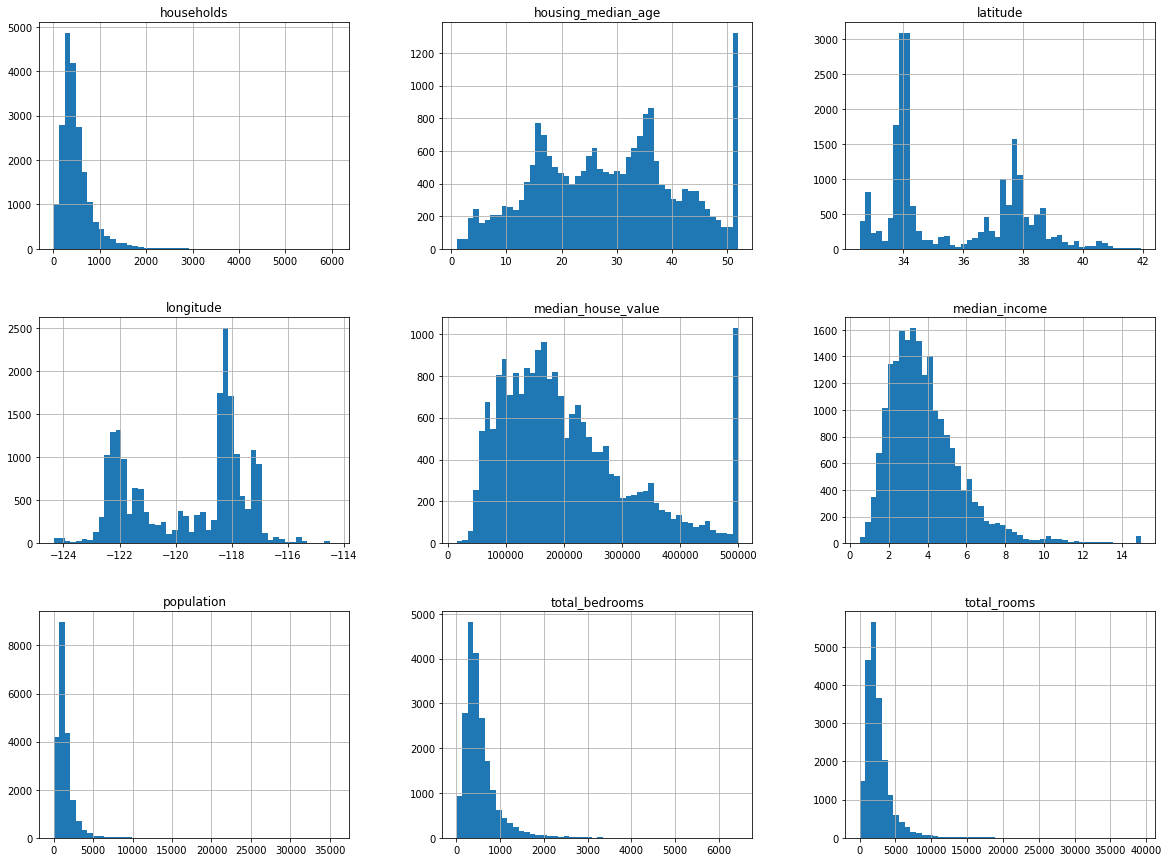

In [89]:
# 下面这行代码只能在jupyter 中使用，在画图时自动调用jupyter内置的画图工具
%matplotlib inline  

import matplotlib.pyplot as plt 
housing.hist(bins=50, figsize=(20,15)) # bins指的是箱子的个数，即每张图柱子的个数， figsize指的是每张图的尺寸
plt.show()

# Create a Test Set

#### 将数据集划分为训练集和测试集之前一定不能过多地对数据进行分析，否则会导致【data snooping bias】数据窥探偏差

### 1.随机划分测试集，存在缺点：每次运行程序得到的数据集都不一样。
##### 解决方案有两种：（1）在一次运行生成测试集后就将它保存起来，在以后的运行中再拿出来使用。（2）使用随机数种子，np.random.seed(42)

In [61]:
import numpy as np

In [62]:
# 按一定比例随机切分测试集
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) # 返回一个新的打乱顺序的索引数组
    test_set_size = int(len(data) * test_ratio) # 测试集样本数量
    test_indices = shuffled_indices[: test_set_size] # 获得测试集样本的索引
    train_indices = shuffled_indices[test_set_size:] # 获得训练集样本的索引
    return data.iloc[train_indices], data.iloc[test_indices] # iloc通过行号来取数据 loc函数通过行的“名字”来取数据

In [63]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


##### 若想使每次运行生成的随机数都一样，可以使用随机数种子，即np.random.seed()

In [13]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data)) # 返回一个新的打乱顺序的索引数组
    print(shuffled_indices) # 输出生成的随机数
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[: test_set_size] # 获得测试集样本的索引
    train_indices = shuffled_indices[test_set_size:] # 获得训练集样本的索引
    return data.iloc[train_indices], data.iloc[test_indices] # iloc通过行号来取数据 loc函数通过行的索引值来取数据

In [14]:
train_set, test_set = split_train_test(housing, 0.2)

[20046  3024 15663 ...  5390   860 15795]


In [15]:
train_set, test_set = split_train_test(housing, 0.2)

[20046  3024 15663 ...  5390   860 15795]


由上述可见，使用了随机数种子，每次运行生成的随机数都相同

### 但是上述方法在数据集有更新时就不再适用了。即数据更新之后，那么每次随机可能不会把更新的数据放进去，而且每次运行之后测试集不一样，不能保证测试集曾经没有被当成训练集被模型训练过。
#### 替代方法是根据每一个数据的标志（identifier ）来判断它是否放入测试集。可以通过哈希来实现。此方法的优点：在数据更新之后，新测试集虽然还是包含新集合的20%，但是新测试集中不包含原本未更新之前存在于训练集中的数据，即：在数据集更新之后，添加进新测试集的全是更新之后的数据，原本旧的测试集中的数据不变

### 2.使用标志符划分测试集，如hash


In [64]:
import hashlib

In [19]:
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio  # 取出hash的最后一位，判断它是否<51，若是则返回true

hash()函数 用于获取取一个对象（字符串或者数值等）的哈希值。其语法为 hash(object) 返回该对象的哈希值
hash.digest()返回哈希值的二进制加密结果
hash.digest()[-1]表示二进制加密结果的最后一位，潘队最后一位是否小于 2^8 * ratio
那么为什么是2^8方呢？因为是字节，8bit，保证哈希值的最后一个字节小于51

因此函数【test_set_check】返回的是一个布尔变量，判断该对象是否已经在测试集中测试过

In [81]:
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash) )
    return data.loc[~in_test_set], data.loc[in_test_set] # 【～】表示否定，表示不在测试集中的数据

In [82]:
housing_with_id = housing.reset_index() # add an 'index' column 重新生成默认的整型索引，将会多一列【index】
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [83]:
print(len(train_set), "train +", len(test_set), "test")

16362 train + 4278 test


### 如果使用行索引作为唯一标识符，需要确保新的数据必须放置在原来数据集的后面，不能删除行。如果做不到的话，可以使用一个最稳定的特征作为标识符。例如，一个地区的经度和维度一定是唯一且百万年不变的，因此可以结合这两个特征来作为唯一标识符：

In [84]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [85]:
print(len(train_set), "train +", len(test_set), "test")

16267 train + 4373 test


### 3.使用sklearn划分数据集

In [86]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [87]:
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


### 4.针对不同的等级进行采样 stratified sampling

In [94]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5) # ceil函数返回输入值的上限
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True) # 大于5时，用5.0替换

In [96]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# 参数 n_splits是将训练数据分成train/test对的组数，可根据需要进行设置，如交叉验证时将其分为几折，默认为10 。参数 random_state控制是将样本随机打乱 相当于随机数种子

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [98]:
housing["income_cat"].value_counts() / len(housing) # 查看每种分类的样本占总数的比例

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [99]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insight 

#### 为了保证训练集的数据不被破坏，我们在观察分析数据时最好使用训练集的副本。不需要也不能分析测试集

In [30]:
housing = strat_train_set.copy()

## Visualizing Geographical Data

#### 分析数据的经度和纬度关系

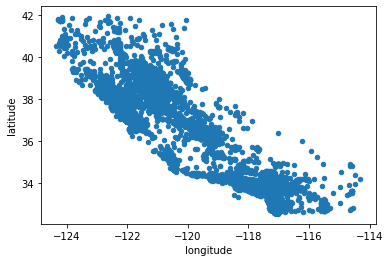

In [31]:
housing.plot(kind="scatter", x="longitude", y="latitude")

#### 可以通过提高点的透明度，观察样本点的分布密集程度
参数【alpha】表示点的不透明度，当点的透明度很高时，单个点的颜色很浅。这样点越密集，对应区域颜色越深。通过颜色很浅就可以就看一看出数据的几种区域。alpha=0，无色

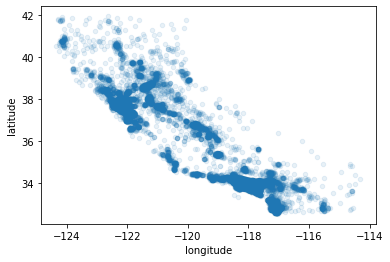

In [32]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

这样就可以看出样本点都集中在什么经纬度

#### 接下来观察我们关注的房价与人口数量、经度、纬度的关系。圈越大表示人口越多，颜色越红表示房价越高

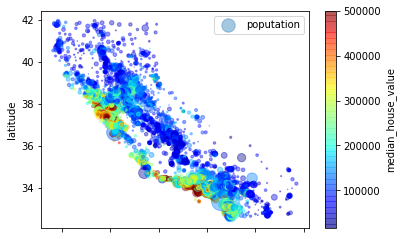

In [106]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
            s=housing["population"]/100, label="poputation",
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

plt.legend() # legend()函数用来给图像加上图例，自定义图例可以通过list喂给legend函数

### 接下来分析属性之间的相关性（皮尔逊相关性系数）

In [107]:
corr_matrix = housing.corr()

查看各属性与房价中位数的相关性，从大到小排序

In [108]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

#### 需要注意相关性系数的性质：
#### 1.接近1 则呈正线性相关
#### 2.接近-1 则呈负线性相关
#### 3.接近0 则相互独立，不相关
#### 4.皮尔逊相关性系数只能反映是否存在线性相关，而不能反映非线性相关。即使皮尔逊相关性系数为0，也有可能存在某种非线性关系


In [110]:
from pandas.plotting import scatter_matrix
# 需要注意 书中代码 from pandas.tools.plotting import scatter_matrix 会报错

使用散点图，画出这四个属性之间的相关性

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bdaad90>,
      dtype=object)

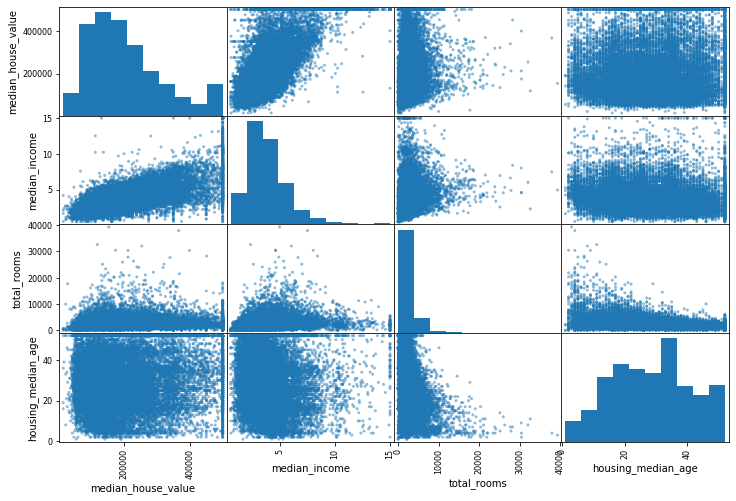

In [111]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

查看平均收入与平均房价之间的关系

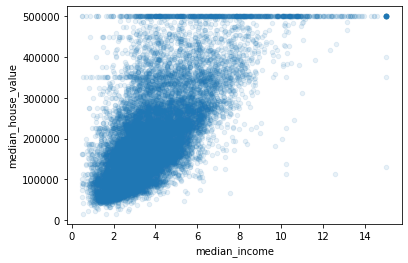

In [42]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

## 通过属性结合构造新的属性，也许会有新的相关性发现

In [112]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [113]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

# Prepare the Data for Machine Learning Algorithms

In [114]:
housing = strat_train_set.drop("median_house_value", axis=1) # 去除需要估测的属性，即去除target variable。注意drop函数不是在原数据上操作，而是返回一个新的数据集
housing_labels = strat_train_set["median_house_value"].copy() # 复制新的label